In [72]:
import numpy as np
import matplotlib.pyplot as plt


In [73]:
# ---------------------------
# 1. Generate Synthetic Dataset
# ---------------------------
np.random.seed(42)
num_samples = 500
num_features = 4
num_classes = 5

# Generate features for each class with some separable pattern
X = np.zeros((num_samples, num_features))
Y = np.zeros(num_samples, dtype=int)

for i in range(num_samples):
    cls = i % num_classes
    X[i, cls % num_features] = np.random.rand() + 1  # class-specific pattern
    Y[i] = cls

# Normalize features manually
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# One-hot encoding
Y_onehot = np.zeros((num_samples, num_classes))
Y_onehot[np.arange(num_samples), Y] = 1

# Train-test split
split_ratio = 0.8
split_index = int(num_samples * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y_onehot[:split_index], Y_onehot[split_index:]

In [101]:
# ---------------------------
# 2. Neural Network
# ---------------------------
class NeuralNetwork:
    def __init__(self):
        # Architecture
        self.inputNeurons = 4
        self.hidden1Neurons = 10
        self.hidden2Neurons = 8
        self.hidden3Neurons = 6
        self.outputNeurons = 5

        self.learning_rate = 0.1

        # Initialize weights
        self.W_IH1 = np.random.randn(self.inputNeurons, self.hidden1Neurons) * 0.1
        self.W_H1H2 = np.random.randn(self.hidden1Neurons, self.hidden2Neurons) * 0.1
        self.W_H2H3 = np.random.randn(self.hidden2Neurons, self.hidden3Neurons) * 0.1
        self.W_H3O = np.random.randn(self.hidden3Neurons, self.outputNeurons) * 0.1

        # Biases
        self.b_H1 = np.zeros((1, self.hidden1Neurons))
        self.b_H2 = np.zeros((1, self.hidden2Neurons))
        self.b_H3 = np.zeros((1, self.hidden3Neurons))
        self.b_O = np.zeros((1, self.outputNeurons))

    # ReLU activation
    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    # Softmax activation
    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    # Forward pass
    def feedForward(self, X):
        self.hidden1_out = self.relu(np.dot(X, self.W_IH1) + self.b_H1)
        self.hidden2_out = self.relu(np.dot(self.hidden1_out, self.W_H1H2) + self.b_H2)
        self.hidden3_out = self.relu(np.dot(self.hidden2_out, self.W_H2H3) + self.b_H3)
        self.output = self.softmax(np.dot(self.hidden3_out, self.W_H3O) + self.b_O)
        return self.output

    # Backpropagation
    def backPropagation(self, X, Y, pred):
        m = X.shape[0]

        # Output delta (softmax + cross-entropy)
        output_delta = pred - Y

        # Hidden layer 3 delta
        hidden3_error = output_delta.dot(self.W_H3O.T)
        hidden3_delta = hidden3_error * self.relu(self.hidden3_out, der=True)

        # Hidden layer 2 delta
        hidden2_error = hidden3_delta.dot(self.W_H2H3.T)
        hidden2_delta = hidden2_error * self.relu(self.hidden2_out, der=True)

        # Hidden layer 1 delta
        hidden1_error = hidden2_delta.dot(self.W_H1H2.T)
        hidden1_delta = hidden1_error * self.relu(self.hidden1_out, der=True)

        # Update weights
        self.W_H3O -= self.learning_rate * np.dot(self.hidden3_out.T, output_delta) / m
        self.W_H2H3 -= self.learning_rate * np.dot(self.hidden2_out.T, hidden3_delta) / m
        self.W_H1H2 -= self.learning_rate * np.dot(self.hidden1_out.T, hidden2_delta) / m
        self.W_IH1 -= self.learning_rate * np.dot(X.T, hidden1_delta) / m

        # Update biases
        self.b_O -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True) / m
        self.b_H3 -= self.learning_rate * np.sum(hidden3_delta, axis=0, keepdims=True) / m
        self.b_H2 -= self.learning_rate * np.sum(hidden2_delta, axis=0, keepdims=True) / m
        self.b_H1 -= self.learning_rate * np.sum(hidden1_delta, axis=0, keepdims=True) / m

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)

In [102]:
# ---------------------------
# 3. Train the Network
# ---------------------------
NN = NeuralNetwork()

In [105]:
loss_history = []
epochs = 2500

for i in range(epochs):
    NN.train(X_train, Y_train)
    pred_train = NN.feedForward(X_train)
    loss = -np.mean(np.sum(Y_train * np.log(pred_train + 1e-9), axis=1))
    loss_history.append(loss)
    if i % 50 == 0:
        print(f"Epoch {i}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.2710
Epoch 50, Loss: 0.2710
Epoch 100, Loss: 0.2709
Epoch 150, Loss: 0.2709
Epoch 200, Loss: 0.2708
Epoch 250, Loss: 0.2708
Epoch 300, Loss: 0.2708
Epoch 350, Loss: 0.2707
Epoch 400, Loss: 0.2707
Epoch 450, Loss: 0.2707
Epoch 500, Loss: 0.2706
Epoch 550, Loss: 0.2706
Epoch 600, Loss: 0.2706
Epoch 650, Loss: 0.2706
Epoch 700, Loss: 0.2705
Epoch 750, Loss: 0.2705
Epoch 800, Loss: 0.2705
Epoch 850, Loss: 0.2706
Epoch 900, Loss: 0.2705
Epoch 950, Loss: 0.2705
Epoch 1000, Loss: 0.2705
Epoch 1050, Loss: 0.2705
Epoch 1100, Loss: 0.2704
Epoch 1150, Loss: 0.2702
Epoch 1200, Loss: 0.2701
Epoch 1250, Loss: 0.2701
Epoch 1300, Loss: 0.2701
Epoch 1350, Loss: 0.2701
Epoch 1400, Loss: 0.2701
Epoch 1450, Loss: 0.2701
Epoch 1500, Loss: 0.2701
Epoch 1550, Loss: 0.2701
Epoch 1600, Loss: 0.2701
Epoch 1650, Loss: 0.2725
Epoch 1700, Loss: 0.2708
Epoch 1750, Loss: 0.2706
Epoch 1800, Loss: 0.2704
Epoch 1850, Loss: 0.2706
Epoch 1900, Loss: 0.2704
Epoch 1950, Loss: 0.2705
Epoch 2000, Loss: 0.270

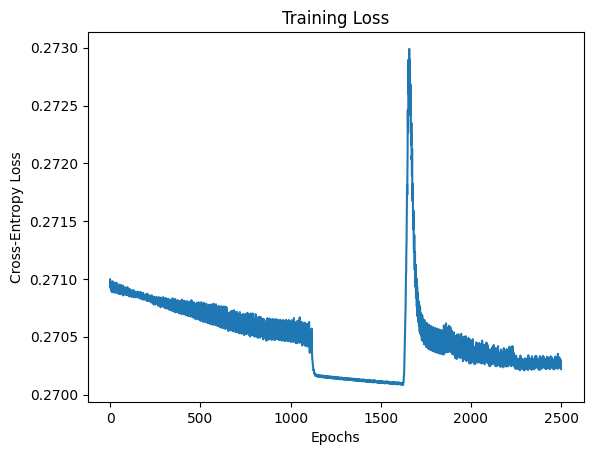

In [106]:

plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss")
plt.show()

In [107]:
print("Softmax output:", pred_prob)


Softmax output: [[5.87769523e-04 6.37745900e-03 9.58732990e-01 3.41756704e-02
  1.26110882e-04]]


In [111]:
# ---------------------------
# 5. Predict a Single Sample
# ---------------------------
sample = np.array([[0.2, 0.3, 0.9, 0.9]])
sample = (sample - X_mean) / X_std  # normalize
pred_prob = NN.feedForward(sample)
pred_class = np.argmax(pred_prob, axis=1)
print("Predicted class for sample:", pred_class[0])

Predicted class for sample: 3
